<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.258078,62.879645,637.193152,752.330874,2.597216,749.733659
1,0.0,1.0,93.435147,87.968103,-909.231371,-717.828122,-644.505081,-73.323040
2,0.0,2.0,92.358208,34.140978,-393.698249,-257.199063,-365.898950,108.699887
3,0.0,3.0,65.688025,89.446206,-660.354834,-495.220603,-368.636210,-126.584393
4,0.0,4.0,79.215593,31.620962,-237.717912,-116.881357,-219.222166,102.340809
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,95.775526,54.842887,-701.183830,-540.565417,363.244142,-903.809559
29996,999.0,26.0,85.790216,66.140398,1463.791528,1625.722142,397.309798,1228.412344
29997,999.0,27.0,81.507218,31.105797,-14.249194,108.363821,279.037686,-170.673864
29998,999.0,28.0,70.461393,27.571916,174.944085,282.977394,263.304260,19.673134


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.258078,62.879645,637.193152,752.330874,2.597216,749.733659
1,0.0,1.0,93.435147,87.968103,-909.231371,-717.828122,-644.505081,-73.323040
2,0.0,2.0,92.358208,34.140978,-393.698249,-257.199063,-365.898950,108.699887
3,0.0,3.0,65.688025,89.446206,-660.354834,-495.220603,-368.636210,-126.584393
4,0.0,4.0,79.215593,31.620962,-237.717912,-116.881357,-219.222166,102.340809
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,95.775526,54.842887,-701.183830,-540.565417,363.244142,-903.809559
29996,999.0,26.0,85.790216,66.140398,1463.791528,1625.722142,397.309798,1228.412344
29997,999.0,27.0,81.507218,31.105797,-14.249194,108.363821,279.037686,-170.673864
29998,999.0,28.0,70.461393,27.571916,174.944085,282.977394,263.304260,19.673134


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.258078,62.879645,637.193152,752.330874,2.597216,749.733659
1,0.0,1.0,93.435147,87.968103,-909.231371,-717.828122,-644.505081,-73.323040
2,0.0,2.0,92.358208,34.140978,-393.698249,-257.199063,-365.898950,108.699887
3,0.0,3.0,65.688025,89.446206,-660.354834,-495.220603,-368.636210,-126.584393
4,0.0,4.0,79.215593,31.620962,-237.717912,-116.881357,-219.222166,102.340809
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,95.775526,54.842887,-701.183830,-540.565417,363.244142,-903.809559
29996,999.0,26.0,85.790216,66.140398,1463.791528,1625.722142,397.309798,1228.412344
29997,999.0,27.0,81.507218,31.105797,-14.249194,108.363821,279.037686,-170.673864
29998,999.0,28.0,70.461393,27.571916,174.944085,282.977394,263.304260,19.673134


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

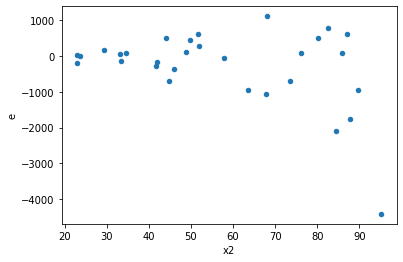

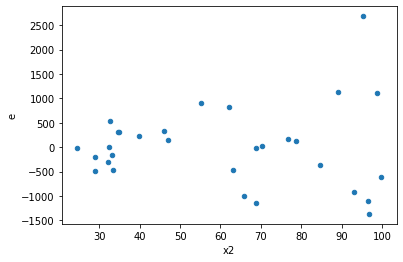

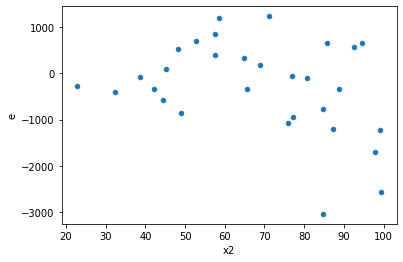

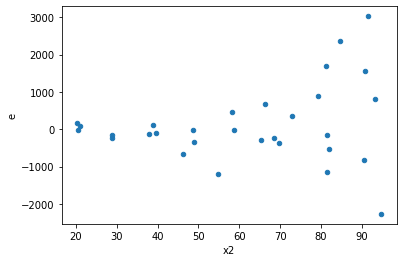

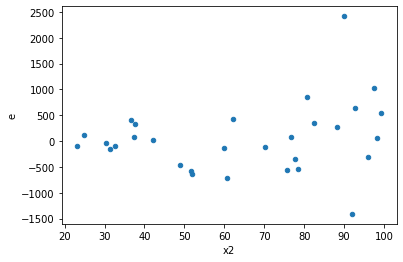

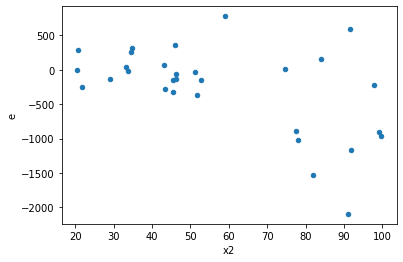

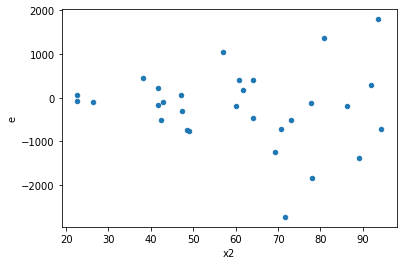

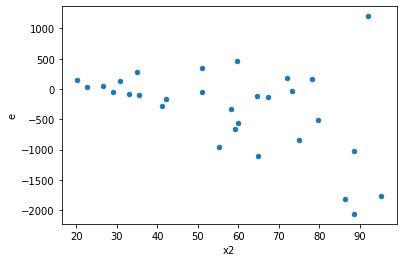

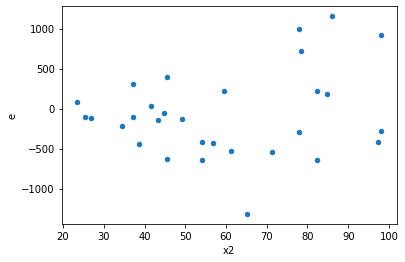

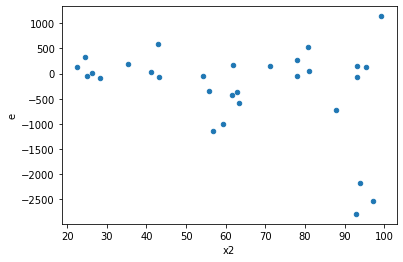

In [12]:
tablenew0 = table.loc[3.0]
tablenew1 = table.loc[4.0]
tablenew2 = table.loc[8.0]
tablenew3 = table.loc[10.0]
tablenew4 = table.loc[13.0]
tablenew5 = table.loc[14.0]
tablenew6 = table.loc[15.0]
tablenew7 = table.loc[16.0]
tablenew8 = table.loc[21.0]
tablenew9 = table.loc[22.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,10.0,10.0,1364021.5089656923,7481179.52335463,136402.15089656922,748117.952335463,5.484649233300908,0.012725320308495824,0.9936373398457521,0.006362660154247912,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,1152512.798744826,3700246.4037927315,115251.27987448261,370024.64037927316,3.210590292639336,0.07965857617777994,0.96017071191111,0.03982928808888997,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,750720.4971322224,14173014.973032096,75072.04971322224,1417301.4973032097,18.879216735354227,6.841557004189092e-05,0.999965792214979,3.420778502094546e-05,Reject001=0 : Heteroscedasticity
9.0,10.0,10.0,1013559.34770347,4088368.531373211,101355.934770347,408836.85313732113,4.0336745358194035,0.038069093756651906,0.980965453121674,0.019034546878325953,Reject001=1 : Homoscedasticity
10.0,10.0,10.0,1066258.1096005603,14269850.701686524,106625.81096005603,1426985.0701686523,13.383111062135105,0.0003226543781016389,0.9998386728109492,0.00016132718905081944,Reject001=0 : Heteroscedasticity
11.0,10.0,10.0,2916856.960122971,11804935.480319025,291685.69601229706,1180493.5480319024,4.047142400778317,0.03764180959596053,0.9811790952020197,0.018820904797980265,Reject001=1 : Homoscedasticity
12.0,10.0,10.0,3130832.2492636875,9210491.68855032,313083.22492636874,921049.168855032,2.9418668760411717,0.10370972179477511,0.9481451391026124,0.051854860897387556,Reject001=1 : Homoscedasticity
13.0,10.0,10.0,950025.862398215,7614285.1362829935,95002.5862398215,761428.5136282993,8.014818793523931,0.0028767261547031353,0.9985616369226484,0.0014383630773515677,Reject001=0 : Heteroscedasticity
17.0,10.0,10.0,5314515.8944618255,6357309.897201794,531451.5894461826,635730.9897201795,1.1962161791305672,0.7824561352160997,0.6087719323919502,0.39122806760804985,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,4213760.440489694,966297.7722067297,421376.04404896934,96629.77722067297,0.22931957947149778,0.02913122815916805,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,1364021.5089656923,7481179.52335463,136402.15089656922,748117.952335463,5.484649233300908,0.012725320308495824,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,1152512.798744826,3700246.4037927315,115251.27987448261,370024.64037927316,3.210590292639336,0.07965857617777994,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,13559883.25700464,1039292.0731912116,1355988.325700464,103929.20731912115,0.07664461806146772,0.00036099930315005766,Reject001=0 : Heteroscedasticity
4.0,10.0,10.0,750720.4971322224,14173014.973032096,75072.04971322224,1417301.4973032097,18.879216735354227,6.841557004189092e-05,Reject001=0 : Heteroscedasticity
5.0,10.0,10.0,6142976.473164595,4348054.244879278,614297.6473164594,434805.4244879278,0.7078090342480751,0.594961693298855,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,17541494.779401306,3208791.8195351977,1754149.4779401305,320879.18195351976,0.1829257916664679,0.012882131815863038,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,9424195.49147713,6146371.576767858,942419.549147713,614637.1576767858,0.6521905856395269,0.5113539568881061,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,15210897.427605923,2535765.4819601155,1521089.7427605924,253576.54819601154,0.1667071580772092,0.009067892154803057,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      551
Reject001=0 : Heteroscedasticity    449
Name: Result_test, dtype: int64